In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



<h1 style = "color:red">Problem Statement</h1>
<h3> There was an organisation named donor foundation.it allocates certain amount of fund to the student's projects but there was huge rise in yoy(year on year) and it was becoming  very difficult to organisation to sort out the donee . As based on yoy data it was known that upcoming years would receive more applications for the fund.so in order to choose donee from these huge no.of applications.The organisation thinks to build a model based on the data </h3>

In [2]:
resources_data = pd.read_csv('/home/yughi/Downloads/resources.csv')
project_data = pd.read_csv('/home/yughi/Downloads/train_data.csv')
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


<h2 style = "color:red">data analysis</h2>
<h3>target data (project_is_approved) </h3>

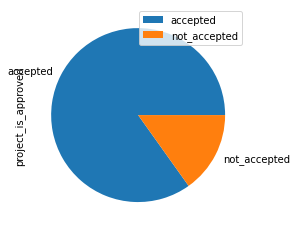

In [4]:
project_data["project_is_approved"].value_counts().plot(kind = "pie",labels = ["accepted","not_accepted"])
plt.legend()
plt.show()

<h3 style = "color : green"> This plot shows that data is heavily imbalanced

<h2>Function for analysing the categorical data </h3>

In [5]:
def univariate_analysis(data,col1,col2 ,top = False):
    analysis = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x : x.eq(1).sum())).reset_index()
    analysis["total"] = pd.DataFrame(data.groupby(col1)[col2].agg(total = "count")).reset_index()["total"]
    analysis["Average"] = pd.DataFrame(data.groupby(col1)[col2].agg(Average = "mean")).reset_index()["Average"]
    analysis.sort_values(by = "total",inplace = True,ascending = False)
    print(analysis.Average.max())
    if top :
        analysis =  analysis[0:top]
   
    plt.bar(analysis[col1],analysis["total"])
    plt.bar(analysis[col1],analysis[col2])
    plt.legend()
    plt.show()
    return analysis
    
    

<h2> analysing the feature school_state </h3>

0.8979591836734694


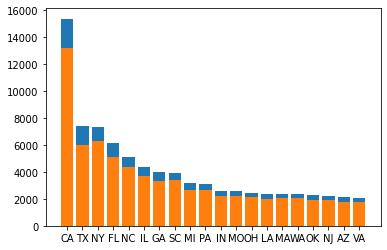

,school_state,project_is_approved,total,Average
4,CA,13205,15388,0.858136
43,TX,6014,7396,0.813142
34,NY,6291,7318,0.859661
9,FL,5144,6185,0.831690
27,NC,4353,5091,0.855038
14,IL,3710,4350,0.852874
10,GA,3329,3963,0.840020
40,SC,3385,3936,0.860010
22,MI,2672,3161,0.845302
38,PA,2658,3109,0.854937


In [6]:
univariate_analysis(project_data,"school_state","project_is_approved",top = 20)

<h3 style = "color:red"> From the above plot we know that state california returned high number of applications and from state virginia got least no.of applications</h3>

<h1 style = "color:yellow">Analysis on feature school state</h1>
<h3>From the below plot we come to know that state ca(california) stands high while vt stands least</h3>

0.8555588538301699


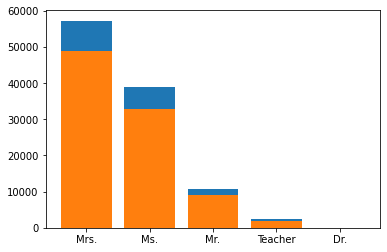

,teacher_prefix,project_is_approved,total,Average
2,Mrs.,48997,57269,0.855559
3,Ms.,32860,38955,0.843537
1,Mr.,8960,10648,0.841473
4,Teacher,1877,2360,0.795339
0,Dr.,9,13,0.692308


In [7]:
univariate_analysis(project_data,"teacher_prefix","project_is_approved")

<h3 style = "color:red"> From the above plot we know that teacher_prefix contains mrs returned high number of applications and with prefix_dr  got least no.of applications it is also observable that it contain low average of applications that are approved </h3>

<h2 style = "color:yellow"> Analysing the teachers </h2>

In [8]:
analysis = pd.DataFrame(project_data.groupby("teacher_id")["project_is_approved"].agg(lambda x : x.eq(1).sum())).reset_index()
analysis["total"] = pd.DataFrame(project_data.groupby("teacher_id")["project_is_approved"].agg(total = "count")).reset_index()["total"]
analysis = analysis.sort_values(by = "project_is_approved",ascending = False)
print(analysis)

                             teacher_id  project_is_approved  total
70484  fa2f220b537e8653fb48878ebb38044d                   44     44
62925  df8a4b7ad173b57f7ac52e447cc24043                   40     42
8702   1f64dcec848be8e95c4482cc845706b2                   40     42
34570  7b17c95da53e3d1f011f84232ad01238                   34     34
49149  ae67d8bbc64ec3bf7fd2db1297721160                   31     33
...                                 ...                  ...    ...
28834  66abe51a2513e5fb5fdfc742a79f320f                    0      1
45501  a19433dacedcf6e299645ac529898f87                    0      1
61026  d8c8fc70df1bd5a405a324389038ce0a                    0      1
28842  66b6d6f4c6ae078995d855acae48274e                    0      1
62066  dc6c3a4eb96af89b6742f0189a208943                    0      1

[72168 rows x 3 columns]


<h3 style = "color:red">The teacher with id fa2f220b537e8653fb48878ebb38044d  sent max 44 applications with full approval_rate.

<h1 style = "color:yellow">Analysis on feature project grade category</h1>

0.8543770363788136


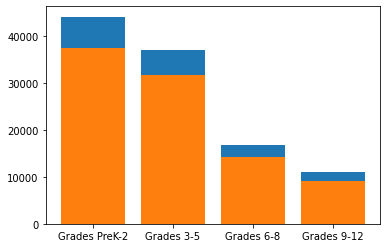

,project_grade_category,project_is_approved,total,Average
3,Grades PreK-2,37536,44225,0.848751
0,Grades 3-5,31729,37137,0.854377
1,Grades 6-8,14258,16923,0.842522
2,Grades 9-12,9183,10963,0.837636


In [11]:
univariate_analysis(project_data,"project_grade_category","project_is_approved")

<h3 style = "color:red">Most of the applications where sent by grades prek-2 and least applications where sent by higher grade.

<h1 style = "color:yellow">Analysis on feature project subject categories</h1>

In [12]:
def cleaning(project_data,col) :
    categories = list(project_data[col].values)

    cleaned_list = []
    for i in categories:
        temp = ""

        for j in i.split(','): 
            if 'The' in j.split():
                j=j.replace('The','') 
             
            temp+=j.strip()+" " 
            temp = temp.replace('&',' ')
        cleaned_list.append(temp.strip())
    return cleaned_list 
    # print(cat_list)
    

In [13]:
cat_list = cleaning(project_data,"project_subject_categories")
project_data['clean_categories'] = cat_list
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History Civics Health Sports


<AxesSubplot:xlabel='project_is_approved', ylabel='clean_categories'>

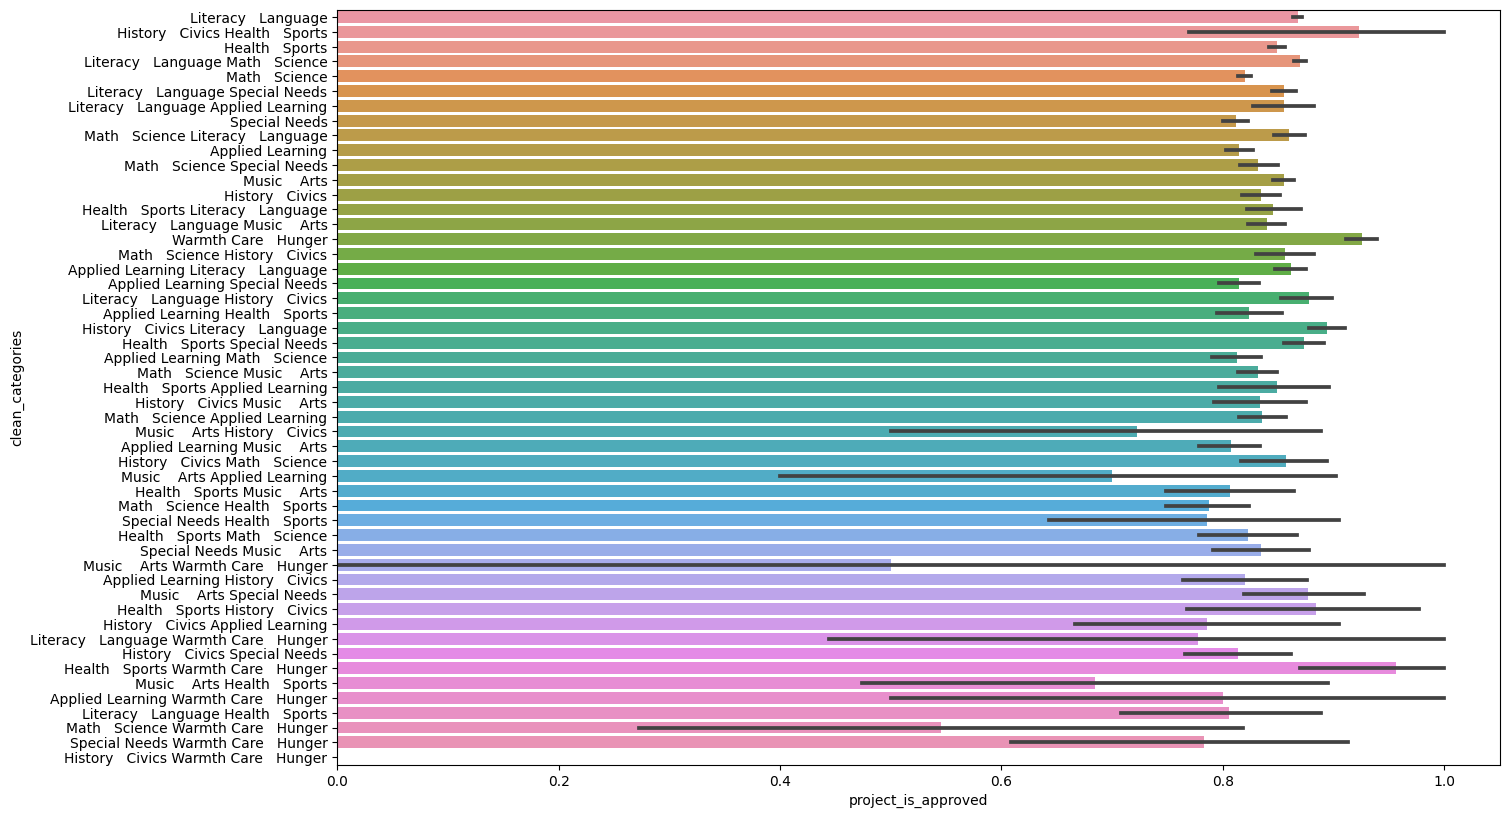

In [21]:
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(15, 10))
sns.barplot(x=project_data.project_is_approved, y=project_data.clean_categories, ax=ax)

0.9565217391304348


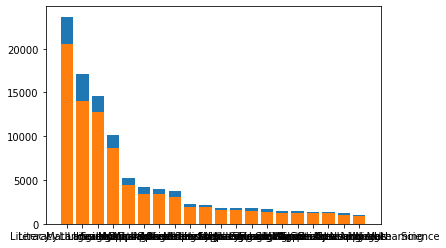

,clean_categories,project_is_approved,total,Average
24,Literacy Language,20520,23655,0.867470
32,Math Science,13991,17072,0.819529
28,Literacy Language Math Science,12725,14636,0.869432
8,Health Sports,8640,10177,0.848973
40,Music Arts,4429,5180,0.855019
46,Special Needs,3431,4226,0.811879
30,Literacy Language Special Needs,3389,3961,0.855592
0,Applied Learning,3072,3771,0.814638
36,Math Science Literacy Language,1968,2289,0.859764
3,Applied Learning Literacy Language,1887,2191,0.861251


In [14]:
univariate_analysis(project_data,"clean_categories","project_is_approved",top = 20)

<h3 style = "color:red">subject category literacy language  has received many applications and from applied machine learning it has received least applications.

<h1 style = "color:yellow">Analysing cleaned subject_subcategories</h1>

In [22]:
subcat_list = cleaning(project_data,"project_subject_subcategories")
project_data['clean_subcategories'] = subcat_list
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History Civics Health Sports,Civics Government Team Sports


1.0


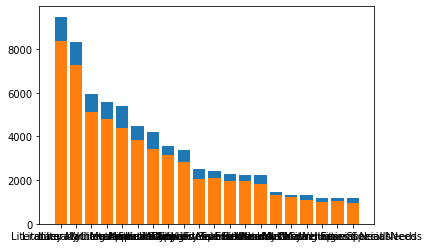

,clean_subcategories,project_is_approved,total,Average
317,Literacy,8371,9486,0.882458
319,Literacy Mathematics,7260,8325,0.872072
331,Literature Writing Mathematics,5140,5923,0.867803
318,Literacy Literature Writing,4823,5571,0.865733
342,Mathematics,4385,5379,0.815207
330,Literature Writing,3846,4501,0.854477
392,Special Needs,3431,4226,0.811879
289,Health Wellness,3131,3583,0.873849
18,Applied Sciences Mathematics,2824,3399,0.830833
0,Applied Sciences,2038,2492,0.817817


In [25]:
univariate_analysis(project_data,"clean_subcategories","project_is_approved",top = 20)

<h1 style = "color:green">Resources data(it contains how much the quantity and price of the products)

In [26]:
resources_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


<h2 style = "color:yellow"> Adding price to the project_data from the resources data </h2> 

In [27]:
# we will match the id with resources data and project_data 
#from the resources data we will find the price of the projects
price_data = resources_data.groupby("id").agg({"price" : "sum","quantity" : "sum"}).reset_index()
project_data = pd.merge(project_data,price_data,on = "id",how = "left")


<h1 style = "color:yellow">Cleaning the data</h1>

<h2 style = "color:green">cleaning:Teacher Prefix</h2>

In [28]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [29]:
project_data["teacher_prefix"].isnull().values.sum()

3

In [30]:
project_data["clean_teacher_prefix"] = project_data["teacher_prefix"].fillna('Mrs.')

In [31]:
project_data['clean_teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: clean_teacher_prefix, dtype: int64

In [32]:
project_data['clean_teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','').str.lower()

project_data['clean_teacher_prefix'].value_counts()

mrs        57269
ms         38955
mr         10648
teacher     2360
dr            13
Name: clean_teacher_prefix, dtype: int64

<h2 style = "color:green">cleaning:School State</h2>

In [33]:
project_data["school_state"].isnull().values.sum()

0

In [34]:
project_data["clean_school_state"] = project_data["school_state"].str.lower()

<h2 style = "color:green">cleaning:submitted_date_time</h2>

In [35]:
project_data["project_submitted_datetime"].isnull().values.sum()

0

In [36]:
project_data["clean_project_submitted_datetime"] = project_data["project_submitted_datetime"].str.replace("-","").str.replace(" ","")\
.str.replace(":","")


<h2 style = "color:green"> cleaning data : project grade category </h2>

In [37]:
project_data["project_grade_category"].isnull().values.sum()

0

In [38]:
project_data["project_submitted_datetime"].isnull().values.sum()
project_data['clean_project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_').str.replace('-','_').str.lower()


<h2 style = "color:green"> cleaning data : project subject categories</h2>

In [39]:
project_data["project_subject_categories"].isnull().values.sum()

0

In [40]:

project_data['clean_project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','').str.replace(' ','').str.replace('&',' ')\
.str.replace(',','_').str.replace("_"," ").str.lower()



In [41]:
project_data["project_subject_subcategories"].isnull().sum()

0

<h2 style = "color:green"> cleaning data : project subject subcategories</h2>

In [42]:
project_data['clean_project_subject_subcategories'] = \
    project_data['project_subject_subcategories'].str.replace(' The ','').str.replace('&',' ').str.replace(',',' ').str.lower()

project_data['clean_project_subject_subcategories'].value_counts()

literacy                                     9486
literacy  mathematics                        8325
literature   writing  mathematics            5923
literacy  literature   writing               5571
mathematics                                  5379
                                             ... 
economics  music                                1
literature   writing  nutrition education       1
extracurricular  financial literacy             1
community service  financial literacy           1
parent involvement  warmth  care   hunger       1
Name: clean_project_subject_subcategories, Length: 401, dtype: int64

<h4 style = "color:green"> function for cleaning data</h4>

In [107]:
import re
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in text_data:
        sent = sentence.lower().replace('\\rn\\', ' ').replace('\\n', ' ')
        sent = re.sub('\W+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e not in stopwords )
        sent = ' '.join(e for e in sent.split() if len(e)>1)
        preprocessed_text.append(sent.strip())
    return preprocessed_text

<h2 style = "color:blue"> list of stop words</h2>

In [108]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

<h2 style = "color:green"> cleaning data : project title</h2>

In [109]:
project_data["clean_project_title"]  = project_data["project_title"].str.replace("n\'t", "not").str.replace("\'re", "")\
.str.replace("\'s","").str.replace("\'d", "").str.replace("--", " ").str.replace(":", " ").str.replace("\\rn\\\\" , "")\
.str.replace("\'ll", "").str.replace("\'t", "").str.replace("\'ve", "").str.replace("\'m", "").str.replace("!", "")\
.str.replace("&", "_").str.replace("-", " ")
# project_data["project_title"]  = project_data["project_title"].str.replace("...", "")

In [110]:
project_data["clean_project_title"] = preprocess_text(project_data["project_title"] )
print(project_data["clean_project_title"].isna().sum())

0


<h2 style = "color:green"> cleaning data : essay</h2>

In [49]:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)


In [50]:
project_data["essay"]  = project_data["essay"].str.replace("n\'t","not").str.replace("\'re","").str.replace("\'s","").str.replace("\'d", "")\
.str.replace("\'ll", "").str.replace("\'t", "").str.replace("\'ve", "").str.replace("\'m", "").str.replace("!", "").str.replace("&", "_")\
.str.replace("-", " ").str.replace("--", " ").str.replace(":", " ")


In [51]:
project_data["essay"] = preprocess_text(project_data["essay"] )

In [52]:
project_data["essay"][0]

'students english learners working english second third languages melting pot refugees immigrants native born americans bringing gift language school 24 languages represented english learner program students every level mastery also 40 countries represented families within school student brings wealth knowledge experiences us open eyes new cultures beliefs respect limits language limits world ludwig wittgenstein english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills providing dvd players students able continue mastery english language even no one home able assist families students within level proficiency status offered part program educational videos specially chosen english learner teacher sent home regularly watch videos help child develop early reading skills parents not access dvd player opportunity check dvd pla

<h2 style = "color:green"> cleaning data : project_resource_summary</h2>

In [53]:
project_data["clean_project_resource_summary"] = project_data["project_resource_summary"].str.replace("n\'t","not").str.replace("\'re","")\
.str.replace("\'s","").str.replace("\'d", "").str.replace("\'ll", "").str.replace("\'t", "").str.replace("\'ve", "").str.replace("\'m", "")\
.str.replace("!", "").str.replace("&", "_").str.replace("-", " ").str.replace("--", " ").str.replace(":", " ").str.replace("\\rn\\\\" , "")


In [54]:
clean_project_resource_summary = preprocess_text(project_data["project_resource_summary"] )

<h2 style = "color:red">Finalising the data</h2>

In [55]:
preprocessed_data = project_data.drop(["Unnamed: 0","id","project_essay_1","project_essay_2","project_essay_3","project_essay_4","teacher_prefix",\
                                       "school_state","project_submitted_datetime","project_grade_category","project_subject_categories",\
                                       "project_title","project_subject_subcategories","project_resource_summary"],axis = 1)
preprocessed_data.head()
preprocessed_data.to_csv('processed_data.csv')

<h1 style = "color:green">Featurisation</h1>

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc,confusion_matrix,classification_report
import seaborn as sns	
from sklearn.utils import resample

In [57]:
processed_data = pd.read_csv('/home/yughi/Downloads/processed_data.csv',nrows = 5000)
processed_data.head(2)


,Unnamed: 0,teacher_id,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,price,quantity,clean_teacher_prefix,clean_school_state,clean_project_submitted_datetime,clean_project_grade_category,clean_project_subject_categories,clean_project_subject_subcategories,clean_project_title,essay,clean_project_resource_summary
0,0,c90749f5d961ff158d4b4d1e7dc665fc,0,0,Literacy Language,ESL Literacy,154.6,23,mrs,in,20161205134357,grades_prek_2,literacy language,esl literacy,educational support english learners home,students english learners working english seco...,My students need opportunities to practice beg...
1,1,897464ce9ddc600bced1151f324dd63a,7,1,History Civics Health Sports,Civics Government Team Sports,299.0,1,mr,fl,20161025092210,grades_6_8,history civics health sports,civics government team sports,wanted projector hungry learners,students arrive school eager learn polite gene...,My students need a projector to help with view...


In [58]:
minority = processed_data[processed_data.project_is_approved == 0]
majority = processed_data[processed_data.project_is_approved == 1]
size = len(majority)
minority_upsampled = resample(minority,n_samples = len(majority),replace = True,random_state = 123)
data =  pd.concat([majority,minority_upsampled])
print(len(data))


8474


In [59]:
y = data["project_is_approved"]
print(y.value_counts())
x_train,x_test,y_train,y_test = train_test_split(data,data["project_is_approved"].values,test_size = 0.25,stratify = y)
x_train.head(2)

1    4237
0    4237
Name: project_is_approved, dtype: int64


,Unnamed: 0,teacher_id,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,price,quantity,clean_teacher_prefix,clean_school_state,clean_project_submitted_datetime,clean_project_grade_category,clean_project_subject_categories,clean_project_subject_subcategories,clean_project_title,essay,clean_project_resource_summary
4103,4103,3e175c268e9bac1d0685d38a4c30ff57,0,0,Literacy Language,Literacy,407.99,3,mrs,az,20160902001150,grades_prek_2,literacy language,literacy,going adventures books listening center,love teaching school filled lively inquisitive...,My students need a ready to go listening cente...
3013,3013,25437e91796345dd09e04eea32e3aa85,6,1,Literacy Language,Literature Writing,709.21,77,mrs,wa,20160730001127,grades_prek_2,literacy language,literature writing,books galore need,students class come diverse backgrounds severa...,My students need a specific collection of read...


In [118]:
#bow for grade_category
# vectorizer = CountVectorizer()
fit_grade_category = CountVectorizer().fit(x_train["clean_project_grade_category"])
x_train_grade = fit_grade_category.transform(x_train["clean_project_grade_category"])
x_test_grade = fit_grade_category.transform(x_test["clean_project_grade_category"])

# bow for teacher_id
fit_teacher_id = CountVectorizer().fit(x_train["teacher_id"])
x_train_teacher_id = fit_teacher_id.transform(x_train["teacher_id"])
x_test_teacher_id = fit_teacher_id.transform(x_test["teacher_id"])

#bow for project_title

# fit_project_title = CountVectorizer().fit(x_train["clean_project_title"])#.apply(lambda x: str(x)))
# x_train_project_title = fit_project_title.transform(x_train["clean_project_title"])
# x_test_project_title = fit_project_title.transform(x_test["clean_project_title"])

#bow for essay
fit_essay = CountVectorizer().fit(x_train["essay"])
x_train_essay = fit_essay.transform(x_train["essay"])
x_test_essay = fit_essay.transform(x_test["essay"])

#bow for teacher_prefix
# fit_teacher_prefix = CountVectorizer().fit(x_train["clean_teacher_prefix"])
# x_train_teacher_prefix = fit_teacher_prefix.transform(x_train["clean_teacher_prefix"])
# x_test_teacher_prefix = fit_teacher_prefix.transform(x_test["clean_teacher_prefix"])

#bow for project_subject_categories
fit_subject_categories = CountVectorizer().fit(x_train["clean_project_subject_categories"])
x_train_subject_categories = fit_subject_categories.transform(x_train["clean_project_subject_categories"])
x_test_subject_categories = fit_subject_categories.transform(x_test["clean_project_subject_categories"])

#bow for project_subject_subcategories
fit_subject_subcategories = CountVectorizer().fit(x_train["clean_project_subject_subcategories"])
x_train_subject_subcategories = fit_subject_subcategories.transform(x_train["clean_project_subject_subcategories"])
x_test_subject_subcategories = fit_subject_subcategories.transform(x_test["clean_project_subject_subcategories"])


#bow for school_state
fit_school_state = CountVectorizer().fit(x_train["clean_school_state"])
x_train_school_state = fit_school_state.transform(x_train["clean_school_state"])
x_test_school_state = fit_school_state.transform(x_test["clean_school_state"])

#bow for project_resource_summary
fit_project_resource_summary = CountVectorizer().fit(x_train["clean_project_resource_summary"])
x_train_project_resource_summary = fit_project_resource_summary.transform(x_train["clean_project_resource_summary"])
x_test_project_resource_summary = fit_project_resource_summary.transform(x_test["clean_project_resource_summary"])

#normalizing price
fit_price = Normalizer().fit(x_train["price"].values.reshape(-1,1))
x_train_price = fit_price .transform(x_train["price"].values.reshape(-1,1))
x_test_price  = fit_price .transform(x_test["price"].values.reshape(-1,1))

#normalizing quantity
fit_quantity= Normalizer().fit(x_train["quantity"].values.reshape(-1,1))
x_train_quantity = fit_quantity .transform(x_train["quantity"].values.reshape(-1,1))
x_test_quantity  = fit_quantity .transform(x_test["quantity"].values.reshape(-1,1))

#normalizing teacher_number_of_previously_posted_projects
fit_teacher_number_of_previously_posted_projects = Normalizer().fit(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
x_train_teacher_number_of_previously_posted_projects = fit_teacher_number_of_previously_posted_projects .transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
x_test_teacher_number_of_previously_posted_projects = fit_teacher_number_of_previously_posted_projects .transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

#normalizing project_submitted_datetime
fit_project_submitted_datetime = Normalizer().fit(x_train["clean_project_submitted_datetime"].values.reshape(-1,1))
x_train_project_submitted_datetime = fit_project_submitted_datetime .transform(x_train["clean_project_submitted_datetime"].values.reshape(-1,1))
x_test_project_submitted_datetime = fit_project_submitted_datetime.transform(x_test["clean_project_submitted_datetime"].values.reshape(-1,1))







6

In [61]:
x_tr = hstack((x_train_project_submitted_datetime,x_train_project_submitted_datetime,x_train_quantity,x_train_price,x_train_project_resource_summary\
              ,x_train_school_state,x_train_subject_subcategories,x_train_subject_categories,x_train_essay,x_train_teacher_id,x_train_grade ))
x_te = hstack((x_test_project_submitted_datetime,x_test_project_submitted_datetime,x_test_quantity,x_test_price,x_test_project_resource_summary\
              ,x_test_school_state,x_test_subject_subcategories,x_test_subject_categories,x_test_essay,x_test_teacher_id,x_test_grade))

<h1 style  = "color:blue">Building a model using bernoulliNB </h1>

In [63]:
%%time

nb = BernoulliNB() 
hyperparams = {'alpha':[0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

model_nb = RandomizedSearchCV(nb,hyperparams,cv = 5,scoring = "roc_auc",return_train_score = True) 
model_nb.fit(x_tr,y_train)


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


RandomizedSearchCV(cv=5, estimator=BernoulliNB(),
                   param_distributions={'alpha': [0.005, 0.001, 0.05, 0.01, 0.1,
                                                  0.5, 1, 5, 10, 50, 100]},
                   return_train_score=True, scoring='roc_auc')

<h2 style = "color:skyblue">computing metrics on bernoulliNB

In [64]:
y_pre_nb = model_nb.predict(x_te)
perf_metrics_nb = classification_report(y_test,y_pre_nb,output_dict = False)
print(perf_metrics_nb)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1060
           1       0.97      0.97      0.97      1059

    accuracy                           0.97      2119
   macro avg       0.97      0.97      0.97      2119
weighted avg       0.97      0.97      0.97      2119



<h1 style  = "color:blue">Building a model using Decision Trees</h1>

In [65]:
%%time

dt = DecisionTreeClassifier()
param = {
    'min_samples_split' : [20] + list(np.arange(10, 50, 3)) ,
    'max_depth': [2, 10, 1, 3, 5]
}
model_dt = GridSearchCV(dt,param_grid = param,cv = 5,return_train_score = True,n_jobs = -1) 
model_dt.fit(x_tr,y_train)



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 10, 1, 3, 5],
                         'min_samples_split': [20, 10, 13, 16, 19, 22, 25, 28,
                                               31, 34, 37, 40, 43, 46, 49]},
             return_train_score=True)

<h2 style = "color:skyblue">computing metrics on decision trees </h2>

In [67]:
y_pre_dt = model_dt.predict(x_te)
perf_metrics_dt = classification_report(y_test,y_pre_dt)
print(perf_metrics_dt)


              precision    recall  f1-score   support

           0       0.58      0.98      0.73      1060
           1       0.93      0.30      0.45      1059

    accuracy                           0.64      2119
   macro avg       0.75      0.64      0.59      2119
weighted avg       0.75      0.64      0.59      2119



In [69]:
ynb_confusion_matrix = confusion_matrix(y_test,y_pre_nb)
ydt_confusion_matrix = confusion_matrix(y_test,y_pre_dt)

In [70]:
labels = ['rejected', 'selected']
pd.DataFrame(ynb_confusion_matrix, index=labels, columns=labels)

,rejected,selected
rejected,1031,29
selected,31,1028


In [71]:
labels = ['rejected', 'selected']
pd.DataFrame(ydt_confusion_matrix, index=labels, columns=labels)

,rejected,selected
rejected,1035,25
selected,741,318


<h3>As we did the two models the accuracy of bernoullinb was higher compared to the decision trees </h3>

<h1 style = "color:red">Conclusion </h1>

<h3> Thus the model we built with an accuracy of 97%  will be helpful for the organisation in finding donee and it saves money as it was automated by a system.so with the help of this they can allocate more funds to the donation .Below was the heat map of confusion_matrix which represents performance of our models </h3>

<h3 style = "color:yellow">Heatmaps for confusion matrix of naibaive test data </h3>

Text(0.5, 1.0, 'confusion matrix of naive bayes test data ')

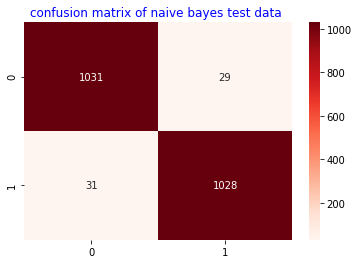

In [74]:
sns.heatmap(ynb_confusion_matrix,annot = True,fmt = 'd',cmap = "Reds")
plt.title("confusion matrix of naive bayes test data ",color = "blue")
